In [1]:
import yfinance as yf
import numpy as np

In [2]:
tickers=['^GSPC','GC=F']
tickers

['^GSPC', 'GC=F']

In [3]:
df=yf.download(tickers,start='2010-01-01')['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


,GC=F,^GSPC
Date,,
2009-12-31,1095.199951,1115.099976
2010-01-04,1117.699951,1132.989990
2010-01-05,1118.099976,1136.520020
2010-01-06,1135.900024,1137.140015
2010-01-07,1133.099976,1141.689941
...,...,...
2023-02-22,1832.000000,3991.050049
2023-02-23,1818.000000,4012.320068
2023-02-24,1808.800049,3970.040039


In [4]:
ret_df=np.log(df/df.shift(1))#log Return
ret_df

,GC=F,^GSPC
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.020336,0.015916
2010-01-05,0.000358,0.003111
2010-01-06,0.015795,0.000545
2010-01-07,-0.002468,0.003993
...,...,...
2023-02-22,-0.000546,-0.001575
2023-02-23,-0.007671,0.005315
2023-02-24,-0.005073,-0.010593


In [5]:
ret_df.corr()

,GC=F,^GSPC
GC=F,1.000000,0.046247
^GSPC,0.046247,1.000000


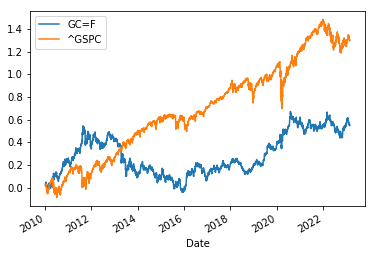

In [6]:
ret_df.cumsum().plot()

In [7]:
ret_df.mean()

GC=F     0.000167
^GSPC    0.000392
dtype: float64

In [8]:
ret_df.std()

GC=F     0.010194
^GSPC    0.011241
dtype: float64

In [9]:
np.ones(len(ret_df.columns))

array([1., 1.])

In [10]:
np.array([0.5,0.5])

array([0.5, 0.5])

In [11]:
w=np.ones(len(ret_df.columns))/(np.ones(len(ret_df.columns))).sum()
w

array([0.5, 0.5])

In [12]:
w*ret_df.mean()

GC=F     0.000083
^GSPC    0.000196
dtype: float64

In [13]:
(w*ret_df.mean()).sum()

0.00027946955264314275

In [14]:
ret_df.mean().dot(w)

0.00027946955264314275

In [15]:
ret_df.mean()

GC=F     0.000167
^GSPC    0.000392
dtype: float64

In [16]:
ret_df.std()

GC=F     0.010194
^GSPC    0.011241
dtype: float64

In [17]:
#portfolio variance
w[0]

0.5

In [18]:
ret_df.cov()

,GC=F,^GSPC
GC=F,0.000104,0.000005
^GSPC,0.000005,0.000126


In [19]:
w[0]**2*0.000104+w[1]**2*0.000126+2*w[0]*w[1]*0.000005

6e-05

In [20]:
6e-05**(1/2)#Square root

0.007745966692414834

In [21]:
w.T.dot(ret_df.cov().dot(w))

6.022492189231152e-05

In [22]:
w.T.dot(ret_df.cov().dot(w))**(1/2)

0.007760471757071958

In [23]:
ret_df.std()

GC=F     0.010194
^GSPC    0.011241
dtype: float64

In [24]:
tickers=['^GSPC','GC=F','TSLA']
df=yf.download(tickers,start='2010-01-01')['Adj Close']
ret_df=np.log(df/df.shift(1))#log Return

[*********************100%***********************]  3 of 3 completed


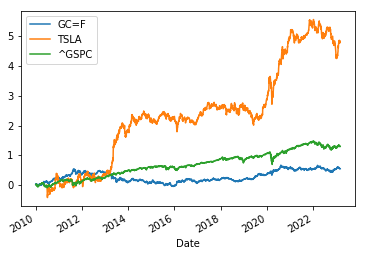

In [25]:
ret_df.cumsum().plot()

In [26]:
ret_df.corr()

,GC=F,TSLA,^GSPC
GC=F,1.000000,0.055139,0.046247
TSLA,0.055139,1.000000,0.430710
^GSPC,0.046247,0.430710,1.000000


In [27]:
w=np.ones(len(ret_df.columns))/(np.ones(len(ret_df.columns))).sum()
w

array([0.33333333, 0.33333333, 0.33333333])

In [28]:
w.T.dot(ret_df.cov().dot(w))**(1/2)

0.014630526381189115

In [29]:
ret_df.mean().dot(w)

0.0006917787425028998

In [30]:
ret_df.mean().dot(w)/w.T.dot(ret_df.cov().dot(w))**(1/2)

0.0472832435743624

In [31]:
ret_df.mean()/ret_df.std()

GC=F     0.016341
TSLA     0.042084
^GSPC    0.034903
dtype: float64